<a href="https://colab.research.google.com/github/yousrabougara/WalmartSalesForecasting/blob/main/CNN_LSTM_LagFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from xgboost import XGBRegressor
from category_encoders import BinaryEncoder
import pickle
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('clean_Walmart.csv')

In [ ]:
df.head()

,Store_0,Store_1,Store_2,Store_3,Store_4,Store_5,Date,Weekly_Sales,Holiday_Flag,Temperature,...,Unemployment,Month,Year,Season_0,Season_1,Season_2,Lag_1,Lag_2,Lag_3,Lag_4
0,0,0,0,0,0,1,2010-02-05,1.057420,0,-0.995136,...,0.056964,2,2010,0,0,1,-1.826402,-1.798349,-1.771203,-1.744944
1,0,0,0,0,0,1,2010-02-12,1.054348,1,-1.201170,...,0.056964,2,2010,0,0,1,1.060488,-1.798349,-1.771203,-1.744944
2,0,0,0,0,0,1,2010-02-19,1.001206,0,-1.124178,...,0.056964,2,2010,0,0,1,1.057444,1.063497,-1.771203,-1.744944
3,0,0,0,0,0,1,2010-02-26,0.642828,0,-0.760907,...,0.056964,2,2010,0,0,1,1.004772,1.060478,1.067142,-1.744944
4,0,0,0,0,0,1,2010-03-05,0.899914,0,-0.767955,...,0.056964,3,2010,0,1,0,0.649568,1.008264,1.064149,1.071619


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0179 - val_loss: 0.0033
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 9.4293e-04 - val_loss: 0.0016
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8.6650e-04 - val_loss: 0.0015
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 8.7494e-04 - val_loss: 0.0014
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step

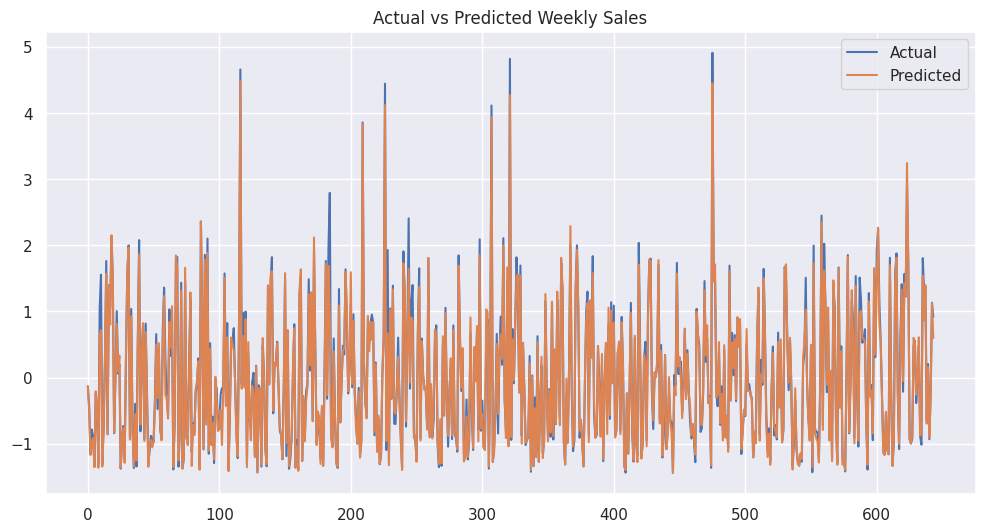

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed

# ✅ Load dataset (assuming df is already loaded)
features = df.columns.drop(['Weekly_Sales', 'Date', 'Year'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# ✅ Scale features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# ✅ Ensure the number of samples is even
num_samples = X_scaled.shape[0]
if num_samples % 2 != 0:
    X_scaled = X_scaled[:-1]
    y_scaled = y_scaled[:-1]

# ✅ Reshape for CNN-LSTM (e.g., 2 time steps per sequence)
X_cnn_lstm = X_scaled.reshape(X_scaled.shape[0] // 2, 2, X_scaled.shape[1])
y_cnn_lstm = y_scaled[1::2]  # Align target with reshaped X

# ✅ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn_lstm, y_cnn_lstm, test_size=0.2, random_state=42)

# ✅ Define CNN-LSTM Model
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'), input_shape=(None, X_train.shape[2], 1)),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# ✅ Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ✅ Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# ✅ Predictions
predictions = model.predict(X_test)

# ✅ Inverse transform predictions and true values to original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# ✅ Metrics computation
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# ✅ MAPE computation
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE while avoiding division by zero."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# ✅ Print the metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# ✅ Visualization of predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()


In [ ]:
!pip install optuna



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.8 MB/s eta 0:00:00


[I 2025-02-12 13:25:39,158] A new study created in memory with name: no-name-02e6ff5f-53c7-421f-a883-783518276bdd


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-02-12 13:26:14,464] Trial 0 finished with value: 0.0011203090815833368 and parameters: {'filters': 105, 'kernel_size': 4, 'lstm_units': 57, 'learning_rate': 0.0012871780313880815, 'batch_size': 64}. Best is trial 0 with value: 0.0011203090815833368.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-02-12 13:27:13,740] Trial 1 finished with value: 0.0008081401279513968 and parameters: {'filters': 88, 'kernel_size': 4, 'lstm_units': 48, 'learning_rate': 0.0010921572272620036, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-02-12 13:27:52,007] Trial 2 finished with value: 0.0009743276553676668 and parameters: {'filters': 63, 'kernel_size': 2, 'lstm_units': 55, 'learning_rate': 0.0011694761051750015, 'batch_size': 32}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-02-12 13:28:43,092] Trial 3 finished with value: 0.0008981461689064669 and parameters: {'filters': 119, 'kernel_size': 5, 'lstm_units': 74, 'learning_rate': 0.001974124454429285, 'batch_size': 32}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-02-12 13:29:26,804] Trial 4 finished with value: 0.0012372411687396941 and parameters: {'filters': 39, 'kernel_size': 5, 'lstm_units': 89, 'learning_rate': 0.007659951927983178, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-02-12 13:30:11,214] Trial 5 finished with value: 0.001475347981442533 and parameters: {'filters': 63, 'kernel_size': 4, 'lstm_units': 70, 'learning_rate': 0.0005736437624203523, 'batch_size': 32}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


[I 2025-02-12 13:30:57,914] Trial 6 finished with value: 0.0016099393941226034 and parameters: {'filters': 64, 'kernel_size': 5, 'lstm_units': 83, 'learning_rate': 0.008716490614932869, 'batch_size': 32}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


[I 2025-02-12 13:31:44,673] Trial 7 finished with value: 0.0019187406342178323 and parameters: {'filters': 126, 'kernel_size': 4, 'lstm_units': 55, 'learning_rate': 0.000255147356806768, 'batch_size': 64}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


[I 2025-02-12 13:32:32,362] Trial 8 finished with value: 0.000981653689612375 and parameters: {'filters': 82, 'kernel_size': 3, 'lstm_units': 35, 'learning_rate': 0.001805704936914882, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-02-12 13:33:17,382] Trial 9 finished with value: 0.0012981396639226506 and parameters: {'filters': 48, 'kernel_size': 2, 'lstm_units': 55, 'learning_rate': 0.00020603348108375166, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[I 2025-02-12 13:34:05,546] Trial 10 finished with value: 0.0008738899348072643 and parameters: {'filters': 92, 'kernel_size': 3, 'lstm_units': 35, 'learning_rate': 0.00047850496646754606, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-02-12 13:34:53,555] Trial 11 finished with value: 0.000989058004303731 and parameters: {'filters': 94, 'kernel_size': 3, 'lstm_units': 32, 'learning_rate': 0.0004955910664792239, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


[I 2025-02-12 13:35:50,885] Trial 12 finished with value: 0.0015216717920897807 and parameters: {'filters': 93, 'kernel_size': 3, 'lstm_units': 42, 'learning_rate': 0.00011418784806879288, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


[I 2025-02-12 13:36:51,792] Trial 13 finished with value: 0.0009894292518329887 and parameters: {'filters': 107, 'kernel_size': 3, 'lstm_units': 44, 'learning_rate': 0.0005766814268805466, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-02-12 13:37:46,388] Trial 14 finished with value: 0.0011047828105284685 and parameters: {'filters': 83, 'kernel_size': 4, 'lstm_units': 44, 'learning_rate': 0.003644728844297661, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-02-12 13:38:53,155] Trial 15 finished with value: 0.000893475346636839 and parameters: {'filters': 74, 'kernel_size': 2, 'lstm_units': 100, 'learning_rate': 0.0003012638774254943, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-02-12 13:39:22,668] Trial 16 finished with value: 0.0012754163548172087 and parameters: {'filters': 101, 'kernel_size': 4, 'lstm_units': 30, 'learning_rate': 0.0008394742438030938, 'batch_size': 64}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


[I 2025-02-12 13:40:22,080] Trial 17 finished with value: 0.0012500689332051694 and parameters: {'filters': 112, 'kernel_size': 3, 'lstm_units': 41, 'learning_rate': 0.0032948727796292487, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-02-12 13:41:18,769] Trial 18 finished with value: 0.0010860794825620483 and parameters: {'filters': 94, 'kernel_size': 3, 'lstm_units': 49, 'learning_rate': 0.00040296710287053447, 'batch_size': 16}. Best is trial 1 with value: 0.0008081401279513968.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-02-12 13:41:48,735] Trial 19 finished with value: 0.0019882396184544363 and parameters: {'filters': 73, 'kernel_size': 4, 'lstm_units': 64, 'learning_rate': 0.00016994690905147055, 'batch_size': 64}. Best is trial 1 with value: 0.0008081401279513968.


Best hyperparameters: {'filters': 88, 'kernel_size': 4, 'lstm_units': 48, 'learning_rate': 0.0010921572272620036, 'batch_size': 16}
Epoch 1/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0164 - val_loss: 0.0032
Epoch 2/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 3/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 4/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 5/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 7/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8.1346e-04 - val_loss: 0.0013
Epoch 9/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.9188e-04 - val_loss: 0.0011
Epoch 10/50
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 7.3591e-04 - va

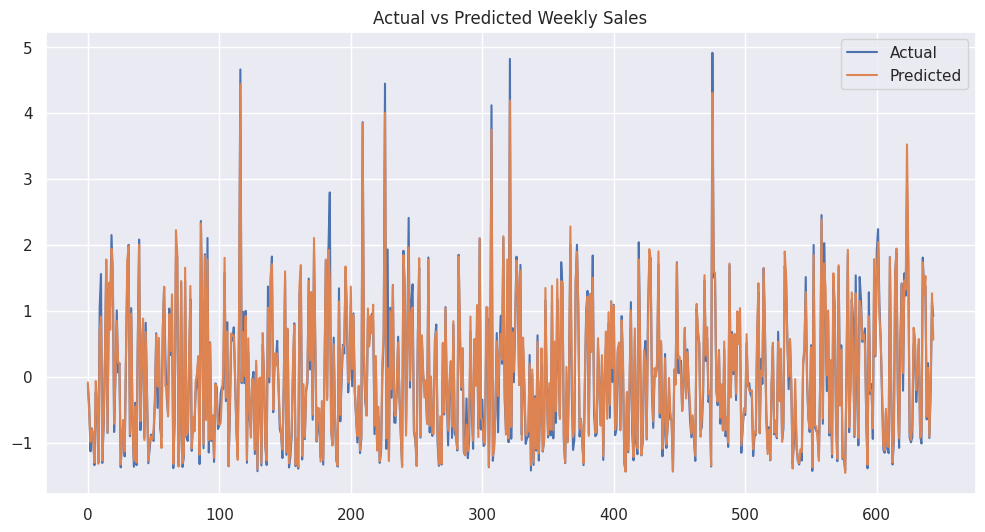

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from tensorflow.keras.optimizers import Adam

# ✅ Load dataset (assuming df is already loaded)
features = df.columns.drop(['Weekly_Sales', 'Date', 'Year'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# ✅ Scale features and target
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# ✅ Ensure even number of samples
num_samples = X_scaled.shape[0]
if num_samples % 2 != 0:
    X_scaled = X_scaled[:-1]
    y_scaled = y_scaled[:-1]

# ✅ Reshape for CNN-LSTM (2 time steps per sequence)
X_cnn_lstm = X_scaled.reshape(X_scaled.shape[0] // 2, 2, X_scaled.shape[1])
y_cnn_lstm = y_scaled[1::2]  # Align target with reshaped X

# ✅ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn_lstm, y_cnn_lstm, test_size=0.2, random_state=42)

# 🔥 Optuna Optimization Function
def objective(trial):
    # ✅ Hyperparameters to optimize
    filters = trial.suggest_int("filters", 32, 128)
    kernel_size = trial.suggest_int("kernel_size", 2, 5)
    lstm_units = trial.suggest_int("lstm_units", 30, 100)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    # ✅ Build CNN-LSTM model
    model = Sequential([
        TimeDistributed(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
                        input_shape=(None, X_train.shape[2], 1)),
        TimeDistributed(MaxPooling1D(pool_size=1)),
        TimeDistributed(Flatten()),
        LSTM(lstm_units, activation='relu'),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # ✅ Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))

    # ✅ Evaluate the model
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)

    return mse  # We want to minimize MSE

# 🔥 Run Optuna Optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# ✅ Best Hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# ✅ Train the final model using the best hyperparameters
model = Sequential([
    TimeDistributed(Conv1D(filters=best_params['filters'], kernel_size=best_params['kernel_size'], activation='relu'),
                    input_shape=(None, X_train.shape[2], 1)),
    TimeDistributed(MaxPooling1D(pool_size=1)),
    TimeDistributed(Flatten()),
    LSTM(best_params['lstm_units'], activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=best_params['learning_rate'])
model.compile(optimizer=optimizer, loss='mse')

# ✅ Train the final model
history = model.fit(X_train, y_train, epochs=50, batch_size=best_params['batch_size'], validation_data=(X_test, y_test), verbose=1)

# ✅ Evaluate the final model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss:.3f}')

# ✅ Predictions
predictions = model.predict(X_test)

# ✅ Inverse transform predictions and true values to original scale
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# ✅ Compute Metrics
r2 = r2_score(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# ✅ Compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE while avoiding division by zero."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

# ✅ Print metrics
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

# ✅ Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Weekly Sales')
plt.show()
